In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
%matplotlib inline
#for matrix math
import numpy as np
#for normalization + probability density function computation
from scipy import stats
#for data preprocessing
import pandas as pd

In [36]:
data=pd.read_csv("dataset-employee.csv")
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [37]:
required_columns=['TotalWorkingYears','MonthlyIncome']
df=data[required_columns]
df

,TotalWorkingYears,MonthlyIncome
0,8,5993
1,10,5130
2,7,2090
3,8,2909
4,6,3468
...,...,...
1465,17,2571
1466,9,9991
1467,6,6142
1468,17,5390


In [38]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components = 2, tol=0.1, max_iter = 10000)
gmm.fit(df)

GaussianMixture(max_iter=10000, n_components=2, tol=0.1)

In [39]:
gmm.means_.flatten()

array([2.03502295e+01, 1.32582844e+04, 8.22834692e+00, 4.23051809e+03])

In [40]:
Gaussian_nr=1
for mu, sd, p in zip(gmm.means_.flatten(), np.sqrt(gmm.covariances_.flatten()), gmm.weights_):
    print('Gaussian {:}: μ = {:.2}, σ = {:.2}, weight = {:.2}'.format(Gaussian_nr, mu, sd, p))
    Gaussian_nr += 1

Gaussian 1: μ = 2e+01, σ = 8.1, weight = 0.25
Gaussian 2: μ = 1.3e+04, σ = 1.4e+02, weight = 0.75


In [41]:
y_gmm=gmm.predict(df)

In [42]:
y_gmm

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

Text(0, 0.5, 'MonthlyIncome')

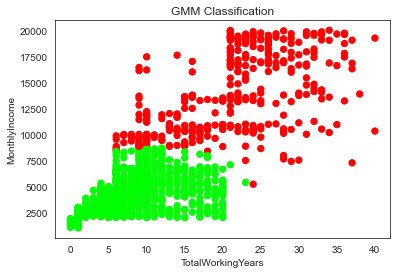

In [43]:
colormap = np.array(['red', 'lime', 'black'])
plt.scatter(df.TotalWorkingYears, df.MonthlyIncome, c=colormap[y_gmm], s=40)
plt.title('GMM Classification')
plt.xlabel('TotalWorkingYears')
plt.ylabel('MonthlyIncome')

In [44]:
df=df[df["cluster"]=y_gmm]

SyntaxError: invalid syntax (Temp/ipykernel_13096/2402072666.py, line 1)